In [27]:
import numpy
import matplotlib.pyplot as plt_train
import matplotlib.pyplot as plt_test
from pandas import read_csv
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import os
from keras.models import model_from_json
# convert an array of values into a dataset matrix

In [28]:
'''
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
#dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
#09_05_2017_10KRows_modified
dataframe = read_csv('dataset/ABIL .csv')
dataframe = dataframe['4. close']
dataset = dataframe.values
dataset = dataset.astype('float32')
print(dataset.shape)
'''

"\ndef create_dataset(dataset, look_back=1):\n\tdataX, dataY = [], []\n\tfor i in range(len(dataset)-look_back-1):\n\t\ta = dataset[i:(i+look_back), 0]\n\t\tdataX.append(a)\n\t\tdataY.append(dataset[i + look_back, 0])\n\treturn numpy.array(dataX), numpy.array(dataY)\n# fix random seed for reproducibility\nnumpy.random.seed(7)\n# load the dataset\n#dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)\n#09_05_2017_10KRows_modified\ndataframe = read_csv('dataset/ABIL .csv')\ndataframe = dataframe['4. close']\ndataset = dataframe.values\ndataset = dataset.astype('float32')\nprint(dataset.shape)\n"

In [29]:
dataframe = read_csv('inputMod.csv')
dataset = dataframe.values
dataset = dataset.astype('float32')
#dataset = numpy.reshape(dataset,(1948,1))
print(dataset.shape)

(4607, 100)


In [30]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
#print(dataset.shape)
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(train.shape)
print(test.shape)
train = numpy.reshape(train, (train.shape[0], 1, train.shape[1]))
test = numpy.reshape(test, (test.shape[0], 1, test.shape[1]))
print(train.shape)
print(test.shape)

(3685, 100)
(922, 100)
(3685, 1, 100)
(922, 1, 100)


In [31]:
dataframeY = read_csv('outputMod.csv')
datasetY = dataframeY.values
datasetY = datasetY.astype('float32')
datasetY = scaler.fit_transform(datasetY)
print(datasetY.shape)

(4607, 50)


In [32]:
trainY, testY = datasetY[0:train_size,:], datasetY[train_size:len(datasetY),:]
print(trainY.shape)
#trainY = numpy.reshape(trainY, (trainY.shape[0], 1, trainY.shape[1]))
print(trainY.shape)
#testY = numpy.reshape(testY, (testY.shape[0], 1, testY.shape[1]))

(3685, 50)
(3685, 50)


In [33]:
model = Sequential()

In [34]:
model = Sequential()
model.add(LSTM(1000, input_shape=(1, 100)))
keras.layers.Dropout(0.2, noise_shape=None, seed=None)
model.add(Dense(500))
keras.layers.Dropout(0.2, noise_shape=None, seed=None)
model.add(Dense(50))
#keras.layers.Dropout(0.2, noise_shape=None, seed=None)
#model.add(Dense(20))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train, trainY, epochs=100, batch_size=50, verbose=2, validation_split=0.2)

Train on 2948 samples, validate on 737 samples
Epoch 1/100
 - 12s - loss: 0.0253 - val_loss: 0.0183
Epoch 2/100
 - 9s - loss: 0.0142 - val_loss: 0.0174
Epoch 3/100
 - 9s - loss: 0.0134 - val_loss: 0.0173
Epoch 4/100
 - 9s - loss: 0.0127 - val_loss: 0.0162
Epoch 5/100
 - 9s - loss: 0.0121 - val_loss: 0.0161
Epoch 6/100
 - 9s - loss: 0.0119 - val_loss: 0.0158
Epoch 7/100
 - 9s - loss: 0.0116 - val_loss: 0.0158
Epoch 8/100
 - 9s - loss: 0.0116 - val_loss: 0.0156
Epoch 9/100
 - 9s - loss: 0.0114 - val_loss: 0.0156
Epoch 10/100
 - 9s - loss: 0.0114 - val_loss: 0.0155
Epoch 11/100
 - 9s - loss: 0.0112 - val_loss: 0.0153
Epoch 12/100
 - 10s - loss: 0.0112 - val_loss: 0.0154
Epoch 13/100
 - 9s - loss: 0.0113 - val_loss: 0.0155
Epoch 14/100
 - 9s - loss: 0.0111 - val_loss: 0.0153
Epoch 15/100
 - 10s - loss: 0.0111 - val_loss: 0.0153
Epoch 16/100
 - 9s - loss: 0.0110 - val_loss: 0.0155
Epoch 17/100
 - 9s - loss: 0.0111 - val_loss: 0.0155
Epoch 18/100
 - 9s - loss: 0.0110 - val_loss: 0.0153
Epoch

In [59]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("trainedModel.h5")
print("Saved model to disk")

Saved model to disk


In [60]:
#Loading the Trained Model while Testing


In [61]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("trainedModel.h5")
print("Loaded model from disk")

Loaded model from disk


In [8]:
trainPredict = loaded_model.predict(train)
#model1= Sequential()
#model1=model

In [10]:
#print(test)

In [9]:
#keras.layers.Dropout(0.2, noise_shape=None, seed=None)
#model.add(Dense(50))

model=loaded_model
model.add(Dropout(0.2, noise_shape=None, seed=None))

#model.add(Dense(20))
testPredict = model.predict(test)
#print(trainPredict)
#print(testPredict)
# invert predictions
# calculate root mean squared error
#trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))

In [62]:
testPredict = loaded_model.predict(test)
trainPredict = loaded_model.predict(train)

In [63]:
print(scaler.inverse_transform(trainPredict))

[[71.88115  71.901375 71.90675  ... 72.34198  72.257645 72.30128 ]
 [71.88115  71.901375 71.90675  ... 72.34198  72.257645 72.30128 ]
 [71.88115  71.901375 71.90675  ... 72.34198  72.257645 72.30128 ]
 ...
 [71.87946  71.918335 71.70391  ... 72.084785 72.49346  72.30243 ]
 [71.72627  71.75413  71.78583  ... 72.28393  72.35488  72.12906 ]
 [71.78643  71.811844 71.79659  ... 72.268745 72.401085 72.33827 ]]


In [64]:
print(scaler.inverse_transform(trainY))

[[71.895    71.93     71.9      ... 72.3      72.275    72.27    ]
 [71.895    71.93     71.9      ... 72.3      72.275    72.27    ]
 [71.895    71.93     71.9      ... 72.3      72.275    72.27    ]
 ...
 [72.01334  71.80253  71.48917  ... 72.0012   72.25601  72.2571  ]
 [71.70707  71.86601  71.78381  ... 72.535286 72.177505 72.0295  ]
 [71.92878  71.661125 71.58889  ... 71.971    72.495514 72.30524 ]]


In [65]:
temptrainPredict = scaler.inverse_transform(trainPredict)
temptrainY = scaler.inverse_transform(trainY)
temptestPredict = scaler.inverse_transform(testPredict)
temptestY = scaler.inverse_transform(testY)

In [66]:
#print(testPredict[1].shape)
trainScore = math.sqrt(mean_squared_error(temptrainY[20], temptrainPredict[20]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(temptestY[20], temptestPredict[20]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.07 RMSE
Test Score: 0.16 RMSE


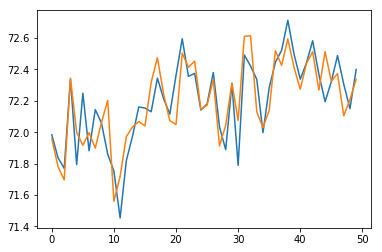

[72.15733  71.98372  71.80227  71.86124  71.99329  71.67873  72.41097
 71.75467  72.2621   71.90715  72.61953  72.38449  71.97533  72.18493
 72.2655   71.97657  72.35157  72.60859  72.164604 71.86144  72.14317
 71.88263  72.683586 71.950836 72.3752   71.72392  72.50042  72.11884
 71.89818  72.45144  71.99448  72.23489  71.99053  72.22184  72.10966
 71.81923  72.26456  72.2607   72.11577  72.423164 72.28639  72.96014
 72.22169  72.64839  72.31317  72.16521  72.28346  72.56618  72.44603
 72.49498 ]


In [69]:
plt_test.plot(temptestY[22])
plt_test.plot(temptestPredict[22])
plt_test.show()
print(temptestY[20])

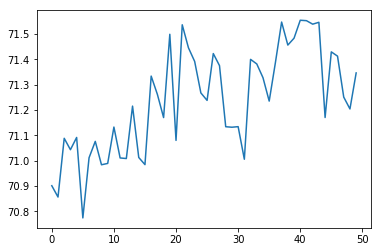

[70.90145  70.856705 71.08866  71.04368  71.09206  70.77426  71.011925
 71.07655  70.98417  70.98947  71.13307  71.011086 71.00878  71.21581
 71.01294  70.98469  71.33435  71.26209  71.17055  71.49948  71.08043
 71.53702  71.44615  71.39231  71.26789  71.23841  71.42333  71.3756
 71.13441  71.13243  71.13468  71.00595  71.40046  71.38233  71.32807
 71.23561  71.38769  71.54778  71.4568   71.48406  71.554924 71.55323
 71.53943  71.5468   71.1708   71.43     71.41315  71.25142  71.20457
 71.34681 ]


In [36]:
plt_test.plot(temptestPredict[20])
plt_test.show()
print(temptestPredict[20])
a=temptestPredict[20]

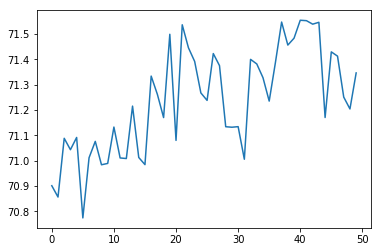

[70.90145  70.856705 71.08866  71.04368  71.09206  70.77426  71.011925
 71.07655  70.98417  70.98947  71.13307  71.011086 71.00878  71.21581
 71.01294  70.98469  71.33435  71.26209  71.17055  71.49948  71.08043
 71.53702  71.44615  71.39231  71.26789  71.23841  71.42333  71.3756
 71.13441  71.13243  71.13468  71.00595  71.40046  71.38233  71.32807
 71.23561  71.38769  71.54778  71.4568   71.48406  71.554924 71.55323
 71.53943  71.5468   71.1708   71.43     71.41315  71.25142  71.20457
 71.34681 ]


In [37]:
plt_test.plot(temptestPredict[20])
plt_test.show()
print(temptestPredict[20])
b=temptestPredict[20]

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


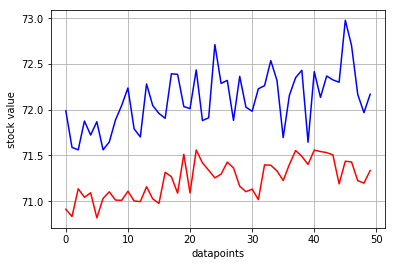

In [38]:
import matplotlib.pyplot as plt
axes = plt.gca()
#axes.set_xlim([0,50])
#axes.set_ylim([0,10])
#plt.text(10,5.8,r'Red = Predictions, Blue = Actual Data')
plt.xlabel('datapoints')
plt.ylabel('stock value')
plt.plot(temptestPredict[100],'r')
plt.plot(temptestY[10],'b')
plt_test.grid('True')
plt_test.show()
#plt.savefig('S&P5001.png')